In [3]:
import plotly
import pandas as pd

In [11]:
!ls ./Pilot_data/

semrel_MSA_pilot_submission_not_ranked.csv  sem_text_rel_ranked.csv


## Data 1

In [12]:
data1 = pd.read_csv("./Pilot_data/sem_text_rel_ranked.csv")
display(data1)

,Index,SourceID,SubsetID,PairID,Text,Score
0,0,Formality,Formality_pp,Formality_pp_222,"It that happens, just pull the plug.\nif that ...",1.0
1,1,STS,STS,STS_237,A black dog running through water.\nA black do...,1.0
2,2,ParaNMT,ParaNMT_pp,ParaNMT_pp_204,I've been searchingthe entire abbey for you.\n...,1.0
3,3,Formality,Formality_pp,Formality_pp_119,If he is good looking and has a good personali...,1.0
4,4,Formality,Formality_pp,Formality_pp_174,"She does not hate you, she is just annoyed wit...",1.0
...,...,...,...,...,...,...
5495,5495,SNLI,SNLI,SNLI_74,A young boy pounding on an anvil.\nWoman sits ...,0.0
5496,5496,Goodreads,Goodreads,Goodreads_210,I love how he recognized his wife tempered his...,0.0
5497,5497,Goodreads,Goodreads,Goodreads_287,I actually read a chapter or two beyond that p...,0.0
5498,5498,SNLI,SNLI,SNLI_697,A boy gives being in the snow two thumbs up.\n...,0.0


In [13]:
data1[data1.isna().any(axis=1)]

,Index,SourceID,SubsetID,PairID,Text,Score


In [14]:
df = data1[["Text", "Score"]]
df = pd.concat((df, pd.DataFrame([{"Text1":ele[0], "Text2":ele[1]} for ele in df.Text.str.split("\n").values])), axis=1)[["Text1", "Text2", "Score"]]
display(df)

,Text1,Text2,Score
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",1.0
1,A black dog running through water.,A black dog is running through some water.,1.0
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,1.0
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",1.0
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",1.0
...,...,...,...
5495,A young boy pounding on an anvil.,Woman sits on the curb talking on a cellphone.,0.0
5496,I love how he recognized his wife tempered his...,"Torpedo Ink is Viktor's Band of Brothers, the ...",0.0
5497,I actually read a chapter or two beyond that p...,Lets say she's a blend of two types of beings.,0.0
5498,A boy gives being in the snow two thumbs up.,A satisfied cat is perched beside a crystal lamp.,0.0


<Axes: >

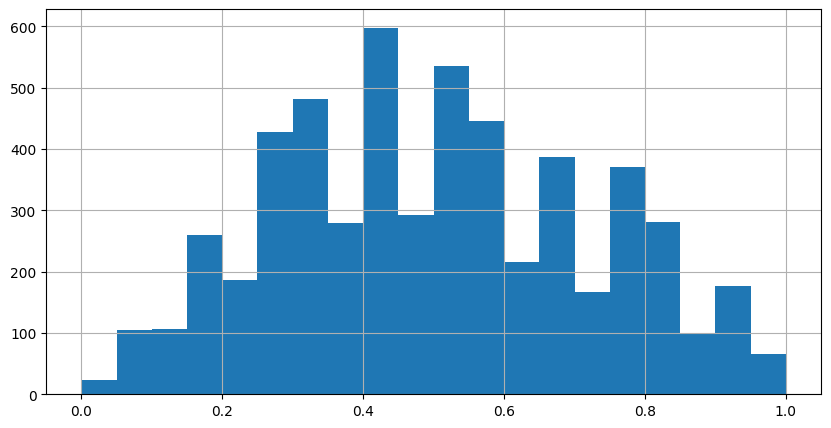

In [15]:
df.Score.hist(figsize=(10, 5), bins=20)

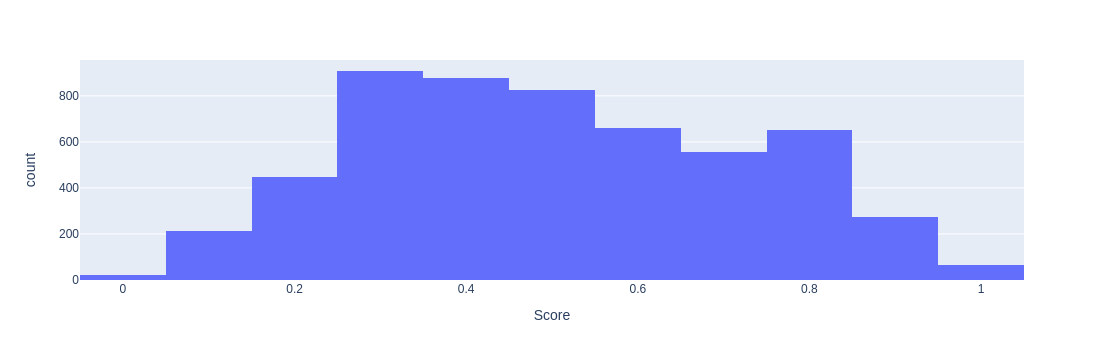

In [24]:
# import plotly.express as px
# df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(df, x="Score", nbins=20)
fig.show()

## Data 2

In [25]:
data2 = pd.read_csv("./Pilot_data/semrel_MSA_pilot_submission_not_ranked.csv")
display(data2)

,Set_ID,Pair_ID,Pair_Part_A,Pair_Part_B,Ann1,Ann2,Ann3,Ann4,Ann5,Source
0,1,1,الأنهار الجليدية والجليد البحري التي كانت معنا...,الأنهار الجليدية والجليد البحري التي كانت معنا...,most,most,most,most,most,IWSLT07_AR_EN
1,1,2,شكرًا لكم.,كبلر هو تلسكوب فضائي يقيس الظلام الباهت للنجوم...,least,least,least,least,least,IWSLT07_AR_EN
2,1,3,لست عالمة في المناخ أنا عالمة فلك.,نحن عند نقطة تحول في تاريخ الإنسانية، تأرجح ال...,NaN,NaN,NaN,NaN,NaN,IWSLT07_AR_EN
3,1,4,لا، إنها في الواقع وجهين لنفس الهدف: فهي لفهم ...,لأن البيئات القاسية لعالمنا الخاص هي آفاق غريب...,NaN,NaN,NaN,NaN,NaN,IWSLT07_AR_EN
4,2,5,أعرفه جيدا. ليس من الضروري أن يكون شيئا قمت بس...,يمكن أن تشعر به في الحقيقة، أو تجربه كشيء مرئي...,NaN,NaN,NaN,NaN,NaN,IWSLT07_AR_EN
...,...,...,...,...,...,...,...,...,...,...
95,24,96,أتلفنا قرابة 50 من هذه المغنطيسات,الآن هذا أكثر عجبا إذا علمتم أن المغنطيسات تزن...,NaN,NaN,most,most,most,IWSLT07_AR_EN
96,25,97,قد يبدو هذا غريبا، لكنني معجبة جدا بوحدات الخر...,أصبحت وحدات الخرسانة بسرعة أكثر وحدات البناء ا...,most,NaN,most,most,most,IWSLT07_AR_EN
97,25,98,أساسا قد أخذت ليغو وحدات الخرسانة، ووحدات بناء...,وفي هذا الأثناء من نفس السنة بالضبط، في مختبرا...,NaN,NaN,NaN,NaN,least,IWSLT07_AR_EN
98,25,99,هذه اللبنات مرمزة لونيا.,نريد أن نجعل كل تفاعل في العالم طوبا جاهزا للا...,least,least,least,NaN,NaN,IWSLT07_AR_EN


In [27]:
data2[~data2.isna().any(axis=1)]

,Set_ID,Pair_ID,Pair_Part_A,Pair_Part_B,Ann1,Ann2,Ann3,Ann4,Ann5,Source
0,1,1,الأنهار الجليدية والجليد البحري التي كانت معنا...,الأنهار الجليدية والجليد البحري التي كانت معنا...,most,most,most,most,most,IWSLT07_AR_EN
1,1,2,شكرًا لكم.,كبلر هو تلسكوب فضائي يقيس الظلام الباهت للنجوم...,least,least,least,least,least,IWSLT07_AR_EN
7,2,8,أدركت أن: الصوت يشبه المال والقوة والسلطة -- ك...,في مخيلتي، كنت دائما أشعر أن الصوت شيء خاص بكم...,most,most,most,most,most,IWSLT07_AR_EN
9,3,10,وفي ذلك الوقت، كان الصوت يميل وهذا إذهلني كثير...,كان كل شيء مسموعاً.,most,most,most,most,most,IWSLT07_AR_EN
11,3,12,أدركت أنه لا يجب أن يحدث ذلك على الإطلاق.,أعرف الصوت في الحقيقة.,least,least,least,least,least,IWSLT07_AR_EN
13,4,14,تكشف بيانات كبلر أحجام الكواكب وكذلك بُعدها عن...,تساعدنا هذه البيانات مجتمعة على فهم ما إذا كان...,most,most,most,most,most,IWSLT07_AR_EN
28,8,29,ا تزعج نفسك وتحاول أن تعرف اذا كانت 40 درجة مئ...,قدت باتجاه منزلي، كان الوقت حينها منتصف الليل،...,most,most,most,most,most,IWSLT07_AR_EN
35,9,36,إذا حدثت أمور سيئة ستقلص من احتمالية أن تصبح ...,أفكاري لم تتبلور تماما إلا بعد شهر تقريبا,least,least,least,least,least,IWSLT07_AR_EN
53,14,54,في الواقع اتخاذ القرارات المالية والإجتماعية--...,"لنفترض أنك ذهبت للطبيب وقال لك ""حصلت على نتائج...",least,least,least,least,least,IWSLT07_AR_EN
59,15,60,لن يقوم الطبيب بوصف أي دواء إن لم يكون مفيدا لي,في الواقع، لا تتبع الممارسات الطبية هذه الطريقة,most,least,most,most,least,IWSLT07_AR_EN
